In [3]:
import os
import glob
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam
from torch.autograd import Variable
import torchvision 
import pathlib
from pathlib import Path
import torch.nn.functional as F

In [4]:
path_folder = 'TOP4040/'

In [5]:
class NPZLoader(Dataset):
    def __init__(self, path, transform=None, cur_iter = 7):
        self.path = path
        self.files = list(Path(path).glob('**/*.npz'))
        self.transform = transform
        self.cur_iter = cur_iter

    def __len__(self):
        return len(self.files)

    def __getitem__(self, item):
        numpy_array = np.load(self.files[item])['arr_0']
        target = numpy_array[-1]
        r,c = numpy_array[0].shape
        n_1_iter = numpy_array[self.cur_iter]
        n_iter = numpy_array[self.cur_iter-1]
        gradient = (n_1_iter - n_iter).reshape(1,r,c)
        sample = np.concatenate((n_1_iter.reshape(1,r,c),gradient)), target.reshape(1,40,40)
        
        
        if self.transform:
            sample = self.transform(sample)
        return sample

In [6]:
class ToTensor:
    def __call__(self, sample):
        
        image, target = sample
        
        return torch.from_numpy(image.astype(np.float32)), torch.from_numpy(target.astype(np.float32))
        

In [7]:
check = NPZLoader(path_folder,cur_iter = 5, transform = ToTensor())

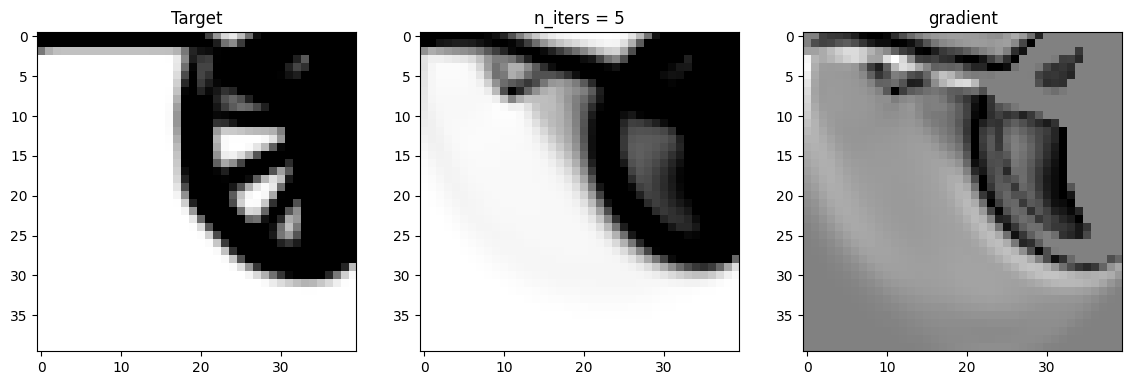

In [8]:
num = 54
plt.figure(figsize = (14,11))
plt.subplot(1,3,1)
plt.title(f'Target')
plt.imshow(check[num][1].view(40,40), cmap= 'binary')

plt.subplot(1,3,2)
plt.title(f'n_iters = {check.cur_iter}')
plt.imshow(check[num][0][0].numpy(), cmap= 'binary')

plt.subplot(1,3,3)
plt.title(f'gradient')
plt.imshow(check[num][0][1].numpy(), cmap= 'binary')

In [169]:
class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet,self).__init__()
        self.pool = nn.MaxPool2d(2,2) 
        self.drop = nn.Dropout()
        
        self.conv1 = nn.Conv2d(2, 16, 3, padding = 1)
        self.conv11 = nn.Conv2d(16, 16, 3, padding = 1)
        self.bn1 = nn.BatchNorm2d(16)
        
        
        self.conv2 = nn.Conv2d(16, 32, 3, padding = 1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv22 = nn.Conv2d(32, 32, 3, padding = 1)
        
        self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
        self.conv33 = nn.Conv2d(64, 64, 3, padding = 1)
        self.bn3 = nn.BatchNorm2d(64)
        
        
        self.conv4 = nn.Conv2d(64,128, 3, padding=1)
        self.conv44 = nn.Conv2d(128,128, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        
        self.conv5 = nn.ConvTranspose2d(128,64,4, padding = 1,stride = 2)
        self.conv55 = nn.Conv2d(64,64,3, padding = 1)
        
        self.conv6 = nn.ConvTranspose2d(64,32,4, padding = 1,stride = 2)
        self.conv66 = nn.Conv2d(32,32,3, padding = 1)
        
        self.conv7 = nn.ConvTranspose2d(32,16,4, padding = 1)
        self.conv77 = nn.Conv2d(16,16,3, padding = 1)
        
        self.conv8 = nn.ConvTranspose2d(16,1, 1, padding = 1)
        
    def forward(self,x): 
        x = F.relu(self.bn1(self.conv1(x)))
        print(f'x1 - {x.shape}')
        x = self.pool(F.relu(self.bn1(self.conv11(x))))
        print(f'x11 - {x.shape}')
        
        x = F.relu(self.bn2(self.conv2(x)))
        print(f'x2 - {x.shape}')
        x = self.pool(F.relu(self.bn2(self.conv22(x))))
        print(f'x22 - {x.shape}')
        
        x = F.relu(self.bn3(self.conv3(x)))
        print(f'x3 - {x.shape}')
        x = self.pool(F.relu(self.bn3(self.conv33(x))))
        print(f'x33 - {x.shape}')
        
        x = F.relu(self.bn4(self.conv4(x)))
        print(f'x4 - {x.shape}')
        x = self.pool(F.relu(self.bn4(self.conv44(x))))
        print(f'x44 - {x.shape}')
        
        x = F.relu(self.bn3(self.conv5(x)))
        print(f'x5 - {x.shape}')
        x = F.relu(self.bn3(self.conv55(x)))
        print(f'x55 - {x.shape}')
        
        x = F.relu(self.bn2(self.conv6(x)))
        print(f'x6 - {x.shape}')
        x = F.relu(self.bn2(self.conv66(x)))
        print(f'x66 - {x.shape}')
        
        x = F.relu(self.bn1(self.conv7(x)))
        print(f'x7 - {x.shape}')
        x = F.relu(self.bn1(self.conv77(x)))
        print(f'x77 - {x.shape}')
        
        x = self.conv8(x)
        print(f'x8 - {x.shape}')
        
        return x
        

In [9]:
class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet,self).__init__()
        self.pool = nn.MaxPool2d(2,2) 
        self.drop = nn.Dropout()
        
        self.conv1 = nn.Conv2d(2, 16, 3, padding = 1)
        self.conv11 = nn.Conv2d(16, 16, 3, padding = 1)
        self.bn1 = nn.BatchNorm2d(16)
        
        
        self.conv2 = nn.Conv2d(16, 32, 3, padding = 1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv22 = nn.Conv2d(32, 32, 3, padding = 1)
        
        self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
        self.conv33 = nn.Conv2d(64, 64, 3, padding = 1)
        self.bn3 = nn.BatchNorm2d(64)
        
        
        self.conv4 = nn.ConvTranspose2d(64,32,4, padding = 1,stride = 2)
        self.conv44 = nn.Conv2d(32,32,3, padding = 1)
        
        self.conv5 = nn.ConvTranspose2d(32,16,4, padding = 1,stride = 2)
        self.conv55 = nn.Conv2d(16,16,3, padding = 1)
        
        self.conv6 = nn.ConvTranspose2d(16,1, 3, padding = 1)
        
    def forward(self,x): 
        x = F.relu(self.bn1(self.conv1(x)))
#         print(f'x1 - {x.shape}')
        x = self.pool(F.relu(self.bn1(self.conv11(x))))
#         print(f'x11 - {x.shape}')
        
        x = F.relu(self.bn2(self.conv2(x)))
#         print(f'x2 - {x.shape}')
        x = self.pool(F.relu(self.bn2(self.conv22(x))))
#         print(f'x22 - {x.shape}')
        
        x = F.relu(self.bn3(self.conv3(x)))
#         print(f'x3 - {x.shape}')
        x = F.relu(self.bn3(self.conv33(x)))
#         print(f'x33 - {x.shape}')

        x = F.relu(self.bn2(self.conv4(x)))
#         print(f'x4 - {x.shape}')
        x = F.relu(self.bn2(self.conv44(x)))
#         print(f'x44 - {x.shape}')
        
        x = F.relu(self.bn1(self.conv5(x)))
#         print(f'x5 - {x.shape}')
        x = F.relu(self.bn1(self.conv55(x)))
#         print(f'x55 - {x.shape}')
        
        x = F.relu(self.conv6(x))
#         print(f'x6 - {x.shape}')
        
        
        return x
        

In [179]:
model

UNet(
  (encoder1): Sequential(
    (enc1conv1): Conv2d(2, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc1norm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1relu1): ReLU(inplace=True)
    (enc1conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc1norm2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1relu2): ReLU(inplace=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (encoder2): Sequential(
    (enc2conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc2norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc2relu1): ReLU(inplace=True)
    (enc2conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc2norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, tra

In [10]:
unet = ConvNet()

In [185]:
conv1 = nn.Conv2d(2, 16, 3, padding = 1)
conv11 = nn.Conv2d(16, 16, 3, padding = 1)
conv33 = nn.Conv2d(64, 64, 3, padding = 1)
pool = nn.MaxPool2d(2,2)
conv2 = nn.Conv2d(16, 32, 3,padding = 1)
conv3 = nn.Conv2d(32, 64, 3, padding = 1)
conv4 = nn.Conv2d(64,128, 3, padding=1)
conv5 = nn.ConvTranspose2d(128, 64, 4,stride = 2, padding = 1)
conv6 = nn.ConvTranspose2d(64, 32, 4,stride = 2, padding = 1)
conv7 = nn.ConvTranspose2d(32, 16, 3, padding = 1)
conv8 = nn.ConvTranspose2d(16, 1, 3, padding = 1)
upsample = nn.Upsample(size = 20, mode = 'nearest')
relu = nn.ReLU()
bn1 = nn.BatchNorm2d(16)
print(exam.shape)
drop = nn.Dropout()
x = F.relu(bn1(conv1(exam)))
print(f'conv1 - {x.shape}')
x = conv11(x)
print(f'conv11 - {x.shape}')
x = pool(x)
print(f'pool - {x.shape}')
x = conv2(x)
print(f'conv2 - {x.shape}')
x = pool(x)
print(f'pool - {x.shape}')
x = conv3(x)
print(f'conv3 - {x.shape}')
x = conv33(x)
print(f'conv33 - {x.shape}')
x = pool(x)
print(f'pool - {x.shape}')
x = conv4(x)
print(f'conv4 - {x.shape}')
x = conv5(x)
print(f'conv5 - {x.shape}')
x = conv6(x)
print(f'conv6 - {x.shape}')
x = conv7(x)
print(f'conv7 - {x.shape}')
x = conv8(x)
print(f'conv8 - {x.shape}')
with torch.no_grad():
    plt.imshow(x[2].numpy().reshape(40,40), cmap = 'binary')

torch.Size([4, 2, 40, 40])
conv1 - torch.Size([4, 16, 40, 40])
conv11 - torch.Size([4, 16, 40, 40])
pool - torch.Size([4, 16, 20, 20])
conv2 - torch.Size([4, 32, 20, 20])
pool - torch.Size([4, 32, 10, 10])
conv3 - torch.Size([4, 64, 10, 10])
conv33 - torch.Size([4, 64, 10, 10])
pool - torch.Size([4, 64, 5, 5])
conv4 - torch.Size([4, 128, 5, 5])
conv5 - torch.Size([4, 64, 10, 10])
conv6 - torch.Size([4, 32, 20, 20])
conv7 - torch.Size([4, 16, 20, 20])
conv8 - torch.Size([4, 1, 20, 20])


ValueError: cannot reshape array of size 400 into shape (40,40)

In [11]:
train_set = [check[i] for i in range(8000)]
test_set = [check[i] for i in range(8000, len(check))]

In [12]:
train_loader = DataLoader(dataset=train_set, batch_size=100, shuffle = True)
test_set = DataLoader(dataset=test_set, batch_size=100, shuffle = True)

In [211]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(unet.parameters(), lr = learning_rate)
n_epochs = 5

for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
#         print(images.shape, labels.shape)
        outputs = unet(images)
        loss = criterion(outputs, labels)
        
        # backward
#         with torch.no_grad():
#             plt.imshow(outputs[0].view(40,40), cmap = 'binary')
#         optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if (i+1) % 1 ==0:
            
            print(f'epoch {epoch+1} / {n_epochs}, step {i+1}/{len(check)}, loss = {loss.item():.4f}')

epoch 1 / 5, step 1/10000, loss = -0.0000
epoch 1 / 5, step 2/10000, loss = -0.0000
epoch 1 / 5, step 3/10000, loss = -0.0000
epoch 1 / 5, step 4/10000, loss = -0.0000
epoch 1 / 5, step 5/10000, loss = -0.0000
epoch 1 / 5, step 6/10000, loss = -0.0000
epoch 1 / 5, step 7/10000, loss = -0.0000
epoch 1 / 5, step 8/10000, loss = -0.0000
epoch 1 / 5, step 9/10000, loss = -0.0000
epoch 1 / 5, step 10/10000, loss = -0.0000
epoch 1 / 5, step 11/10000, loss = -0.0000
epoch 1 / 5, step 12/10000, loss = -0.0000
epoch 1 / 5, step 13/10000, loss = -0.0000
epoch 1 / 5, step 14/10000, loss = -0.0000
epoch 1 / 5, step 15/10000, loss = -0.0000
epoch 1 / 5, step 16/10000, loss = -0.0000
epoch 1 / 5, step 17/10000, loss = -0.0000
epoch 1 / 5, step 18/10000, loss = -0.0000
epoch 1 / 5, step 19/10000, loss = -0.0000
epoch 1 / 5, step 20/10000, loss = -0.0000
epoch 1 / 5, step 21/10000, loss = -0.0000
epoch 1 / 5, step 22/10000, loss = -0.0000
epoch 1 / 5, step 23/10000, loss = -0.0000
epoch 1 / 5, step 24

KeyboardInterrupt: 

In [64]:
exiter = iter(test_set)
exam, target = next(exiter)

In [65]:
exam.shape

torch.Size([4, 2, 40, 40])

In [88]:
target.shape

torch.Size([4, 40, 40])

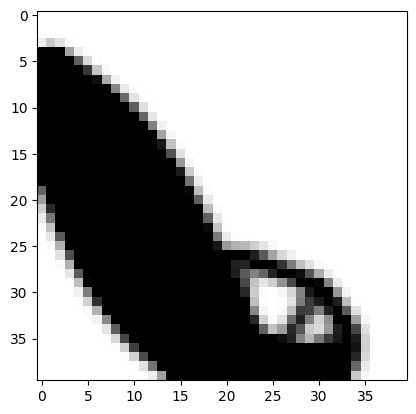

In [194]:
plt.imshow(target.view(4,1,40,40)[0][0], cmap = 'binary')

In [66]:
image_check = check[0][0]

In [67]:
image_check[0].shape

torch.Size([40, 40])

torch.Size([4, 2, 40, 40])
conv1 - torch.Size([4, 16, 40, 40])
pool - torch.Size([4, 16, 20, 20])
conv2 - torch.Size([4, 32, 20, 20])
drop - torch.Size([4, 32, 20, 20])
conv4 - torch.Size([4, 64, 20, 20])
pool - torch.Size([4, 64, 10, 10])
conv4 - torch.Size([4, 128, 10, 10])
conv5 - torch.Size([4, 64, 20, 20])
conv6 - torch.Size([4, 32, 40, 40])
conv7 - torch.Size([4, 16, 40, 40])
conv8 - torch.Size([4, 1, 40, 40])


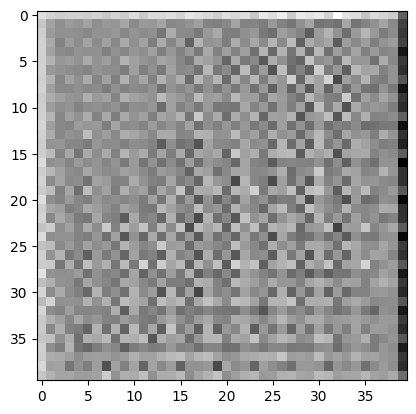

In [142]:
conv1 = nn.Conv2d(2, 16, 3, padding = 1)
pool = nn.MaxPool2d(2,2)
conv2 = nn.Conv2d(16, 32, 3,padding = 1)
conv3 = nn.Conv2d(32, 64, 3, padding = 1)
conv4 = nn.Conv2d(64,128, 3, padding=1)
conv5 = nn.ConvTranspose2d(128, 64, 4,stride = 2, padding = 1)
conv6 = nn.ConvTranspose2d(64, 32, 4,stride = 2, padding = 1)
conv7 = nn.ConvTranspose2d(32, 16, 3, padding = 1)
conv8 = nn.ConvTranspose2d(16, 1, 3, padding = 1)
upsample = nn.Upsample(size = 20, mode = 'nearest')
print(exam.shape)
drop = nn.Dropout()
x = conv1(exam)
print(f'conv1 - {x.shape}')
x = pool(x)
print(f'pool - {x.shape}')
x = conv2(x)
print(f'conv2 - {x.shape}')
x = drop(x)
print(f'drop - {x.shape}')
x = conv3(x)
print(f'conv4 - {x.shape}')
x = pool(x)
print(f'pool - {x.shape}')
x = conv4(x)
print(f'conv4 - {x.shape}')
x = conv5(x)
print(f'conv5 - {x.shape}')
x = conv6(x)
print(f'conv6 - {x.shape}')
x = conv7(x)
print(f'conv7 - {x.shape}')
x = conv8(x)
print(f'conv8 - {x.shape}')
with torch.no_grad():
    plt.imshow(x[2].numpy().reshape(40,40), cmap = 'binary')

In [69]:
up_check = image_check[0].view(1,1,40,40)

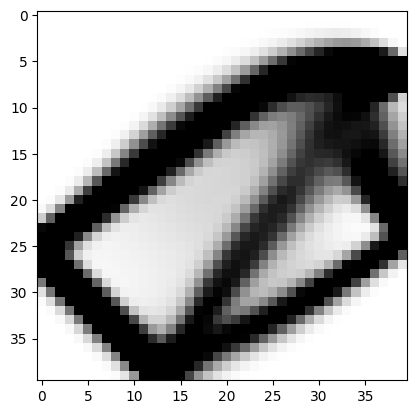

In [70]:
plt.imshow(np.reshape(up_check.numpy(), (40,40)), cmap = 'binary')

In [71]:
up = nn.Upsample(size = (80,80))

In [72]:
up_check_sam = up(up_check)
up_check_sam.shape

torch.Size([1, 1, 80, 80])

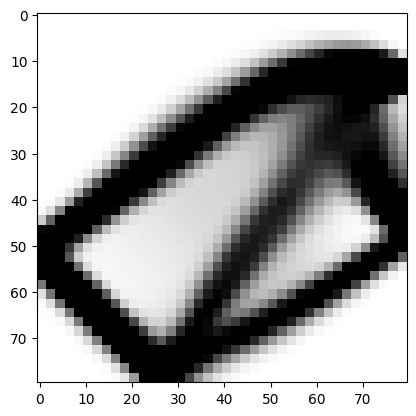

In [73]:
plt.imshow(np.reshape(up_check_sam.numpy(), (80,80)), cmap = 'binary')

In [18]:
m = nn.Upsample( size = (8,8),mode='nearest')

In [20]:
m(a).view(8,8), m(a).shape

(tensor([[ 0.,  0.,  1.,  1.,  2.,  2.,  3.,  3.],
         [ 0.,  0.,  1.,  1.,  2.,  2.,  3.,  3.],
         [ 4.,  4.,  5.,  5.,  6.,  6.,  7.,  7.],
         [ 4.,  4.,  5.,  5.,  6.,  6.,  7.,  7.],
         [ 8.,  8.,  9.,  9., 10., 10., 11., 11.],
         [ 8.,  8.,  9.,  9., 10., 10., 11., 11.],
         [12., 12., 13., 13., 14., 14., 15., 15.],
         [12., 12., 13., 13., 14., 14., 15., 15.]]),
 torch.Size([1, 1, 8, 8]))

In [16]:
m(b).view(1,8,8)

tensor([[[ 0.0000,  0.0000,  0.1250,  0.3750,  0.6250,  0.8750,  1.1250,
           1.3750],
         [ 1.6250,  1.8750,  2.1250,  2.3750,  2.6250,  2.8750,  3.0000,
           3.0000],
         [ 4.0000,  4.0000,  4.1250,  4.3750,  4.6250,  4.8750,  5.1250,
           5.3750],
         [ 5.6250,  5.8750,  6.1250,  6.3750,  6.6250,  6.8750,  7.0000,
           7.0000],
         [ 8.0000,  8.0000,  8.1250,  8.3750,  8.6250,  8.8750,  9.1250,
           9.3750],
         [ 9.6250,  9.8750, 10.1250, 10.3750, 10.6250, 10.8750, 11.0000,
          11.0000],
         [12.0000, 12.0000, 12.1250, 12.3750, 12.6250, 12.8750, 13.1250,
          13.3750],
         [13.6250, 13.8750, 14.1250, 14.3750, 14.6250, 14.8750, 15.0000,
          15.0000]]])

In [24]:
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=2, out_channels=1, init_features=16, pretrained=False)

C:\Users\test\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/mateuszbuda/brain-segmentation-pytorch/zipball/master" to C:\Users\test/.cache\torch\hub\master.zip


In [26]:
learning_rate = 0.001
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.ADAM(model.parameters(), lr = learning_rate)
# n_epochs = 2

# for epochs in range(n_epochs):
#     for i, (images, labels) in enumerate(train_loader):
        
# #         print(images.shape, labels.shape)
#         outputs = model(images)
#         loss = criterion(outputs, labels)
        
        
#         # backward
        
#         optimizer.zero_grad()
        
#         loss.backward()
        
#         optimizer.step()
        
#         if (i+1) % 100 ==0:
            
#             print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

In [16]:
import torch
import torch.nn as nn
import torchvision.transforms.functional as TF

''' inplace=True means that 
                it will modify the input 
                directly, without allocating any
                additional output. It can sometimes slightly decrease the memory usage
'''
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels,kernel_size=3,stride = 1,padding = 1, bias =False), # bias false cause we use batch norm
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels,kernel_size=3,stride = 1,padding = 1, bias =False), # bias false cause we use batch norm
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self,x):
        return self.conv(x)



class UNET(nn.Module):
    def __init__(
        self, in_channels = 3, out_channels = 1, features = [64,128,256,512] # features - the channels
    ):
        super().__init__()
        self.ups = nn.ModuleList()
        self.downs = nn.ModuleList()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        #Down part of UNET

        for feature in features:
            self.downs.append(DoubleConv(in_channels, feature))
            in_channels = feature

        # up part of UNET

        for feature in reversed(features):
            self.ups.append(
                nn.ConvTranspose2d(feature *2, feature, kernel_size=2, stride = 2)
            )

            self.ups.append(DoubleConv(feature*2, feature))

        self.bottleneck = DoubleConv(features[-1], features[-1]*2)
        self.final_conv = nn.Conv2d(features[0], out_channels, kernel_size=1)

           
    def forward(self,x):
        skip_connections = []

        for down in self.downs:
            x = down(x)
            skip_connections.append(x)
            x = self.pool(x)
        
        x = self.bottleneck(x)
        skip_connections = skip_connections[::-1]

        for idx in range(0, len(self.ups), 2):
            x = self.ups[idx](x) # ConvTranspose2d
            skip_connection = skip_connections[idx//2]

            if x.shape != skip_connection.shape:
                x = TF.resize(x, size = skip_connection.shape[2:])

            concat_skip = torch.cat((skip_connection,x), dim = 1) # concatenaate and the double conv
            x = self.ups[idx+1](concat_skip)

        return self.final_conv(x)

# def test():
#     x = torch.randn((3,2,160,160))
#     model = UNET(in_channels=2, out_channels=1)
#     preds = model(x)
#     print(f'pred - {preds.shape}')
#     print(x.shape)
#     # assert preds.shape == x.shape

# if __name__ == "__main__":
#     test()

pred - torch.Size([3, 1, 160, 160])
torch.Size([3, 2, 160, 160])


In [27]:
model = UNET(in_channels=2, out_channels = 1)

In [32]:
learning_rate = 1e-4
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
n_epochs = 2

for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
#         print(images.shape, labels.shape)
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        
        # backward
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if (i+1) % 1 ==0:
            
            print(f'epoch {epoch+1} / {n_epochs}, step {i+1}/{len(train_loader)}, loss = {loss.item():.4f}')

epoch 1 / 2, step 1/80, loss = 0.4785
epoch 1 / 2, step 2/80, loss = 0.4218
epoch 1 / 2, step 3/80, loss = 0.3850
epoch 1 / 2, step 4/80, loss = 0.3569
epoch 1 / 2, step 5/80, loss = 0.3453
epoch 1 / 2, step 6/80, loss = 0.3224
epoch 1 / 2, step 7/80, loss = 0.3140
epoch 1 / 2, step 8/80, loss = 0.2995
epoch 1 / 2, step 9/80, loss = 0.2928
epoch 1 / 2, step 10/80, loss = 0.2892
epoch 1 / 2, step 11/80, loss = 0.2780
epoch 1 / 2, step 12/80, loss = 0.2674
epoch 1 / 2, step 13/80, loss = 0.2697
epoch 1 / 2, step 14/80, loss = 0.2721
epoch 1 / 2, step 15/80, loss = 0.2516
epoch 1 / 2, step 16/80, loss = 0.2644
epoch 1 / 2, step 17/80, loss = 0.2492
epoch 1 / 2, step 18/80, loss = 0.2502
epoch 1 / 2, step 19/80, loss = 0.2497
epoch 1 / 2, step 20/80, loss = 0.2445
epoch 1 / 2, step 21/80, loss = 0.2451
epoch 1 / 2, step 22/80, loss = 0.2503
epoch 1 / 2, step 23/80, loss = 0.2366
epoch 1 / 2, step 24/80, loss = 0.2414
epoch 1 / 2, step 25/80, loss = 0.2482
epoch 1 / 2, step 26/80, loss = 0.

In [62]:
test_ex = next(iter(test_set))

In [63]:
pr = model(test_ex[0])

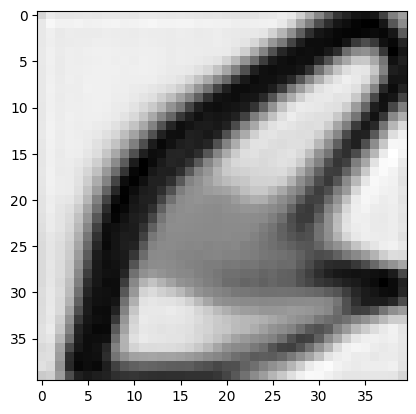

In [64]:
with torch.no_grad():
    plt.imshow(pr[0].view(40,40), cmap='binary')

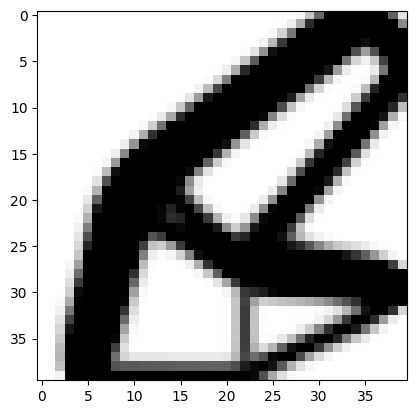

In [65]:
plt.imshow(test_ex[1][0].view(40,40), cmap='binary')

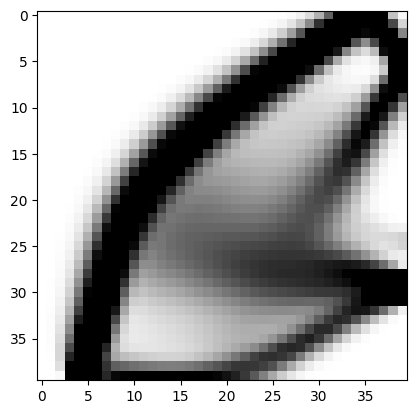

In [67]:
plt.imshow(test_ex[0][0][0].view(40,40), cmap='binary')

In [59]:
test_ex[0][0].shape

torch.Size([2, 40, 40])